## Exploring HCRs identification by contacts

In [2]:
import os
import sys
import cooler 
import matplotlib.pyplot as plt 
import seaborn as sns 

import pandas as pd 
import numpy as np

from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
os.chdir("/data3/wangyb/0.CPhasing/0.simulation/strawberry/F_c/n5m")

In [5]:
cool = cooler.Cooler("./F_c.pairs.10000.cool")
bins = cool.bins()
chrom_bin_idx_df = bins[:].reset_index()[['index', 'chrom']].set_index('chrom')
chrom_bin_idx = bins[:].reset_index()[['index', 'chrom']].groupby('chrom').agg(list).to_dict()['index']
chrom_bin_idx_df


,index
chrom,
hap1_1A.ctg1,0
hap1_1A.ctg1,1
hap1_1A.ctg1,2
hap1_1A.ctg1,3
hap1_1A.ctg1,4
...,...
hap2_7D.ctg7,159747
hap2_7D.ctg7,159748
hap2_7D.ctg7,159749


In [6]:
test_idxes = chrom_bin_idx_df.loc[['hap1_3A.ctg5', 'hap1_2A.ctg3', 
                                   'hap1_7D.ctg1', 'hap2_1C.ctg8',
                                   'hap2_1D.ctg4', 'hap2_1D.ctg3']]['index'].to_list()
test_matrix = cool.matrix(balance=False, sparse=True)[:].tocsr() # [test_idxes, :][:, test_idxes]

In [15]:
test_matrix.shape

(159752, 159752)

<ipython-input-71-e9e7217a9d0f>:1: RuntimeWarning: divide by zero encountered in log10
  plt.matshow(np.log10(test_matrix.toarray()), cmap='YlOrRd')


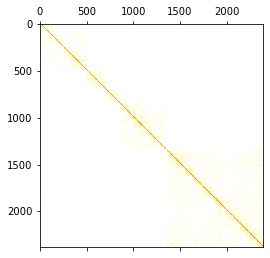

In [71]:
plt.matshow(np.log10(test_matrix.toarray()), cmap='YlOrRd')

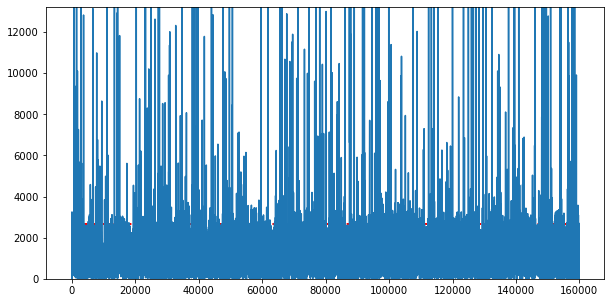

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test_matrix.sum(axis=1))

plt.ylim((0, np.median(np.array(test_matrix.sum(axis=1))) *10))
ax.hlines(np.median(np.array(test_matrix.sum(axis=1))) *2, -100, test_matrix.shape[1], colors='r', linestyles='--', linewidth=2)


In [76]:
np.median(np.array(test_matrix.sum(axis=1)))

1322.0

In [88]:
np.where(np.array(test_matrix.sum(axis=1)) > 1322 * 2)[0].shape

(3139,)

: 

In [79]:
np.array(test_matrix.sum(axis=1)).shape

(159752, 1)

<AxesSubplot:ylabel='Density'>

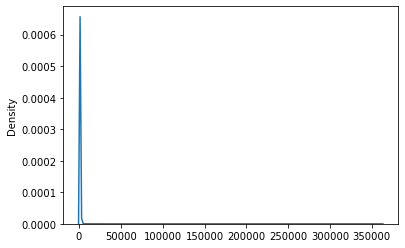

In [86]:
sns.kdeplot(np.array(test_matrix.sum(axis=1)).T[0])

In [85]:
np.array(test_matrix.sum(axis=1)).T[0]

array([1023,  921,  765, ...,  442,  959,  319])

## hexaploid Jerusalem artichoke 

In [20]:
os.chdir("/data3/wangyb/0.CPhasing/0.simulation/HT")


In [21]:
cool = cooler.Cooler("./HT.10000.cool")
matrix = cool.matrix(balance=False, sparse=True)[:]

(0.0, 2000.0)

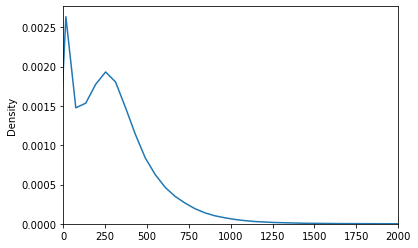

In [5]:
sns.kdeplot(np.array(matrix.sum(axis=1)).T[0])
plt.xlim(0, 2000)

In [22]:
sum_array = np.array(matrix.sum(axis=1))
sum_array_nonzero = sum_array[sum_array > 0]
np.median(sum_array_nonzero)
np.percentile(sum_array_nonzero, 95)

739.0

In [9]:
np.mean(np.array(matrix.sum(axis=1)))

292.35613280283275

## C88

In [7]:
os.chdir("/data3/wangyb/0.CPhasing/0.simulation/C88")


In [8]:
cool = cooler.Cooler("./C88.10000.cool")
matrix = cool.matrix(balance=False, sparse=True)[:]

(0.0, 10000.0)

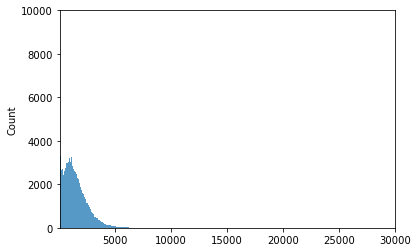

In [46]:
sns.histplot(np.array(matrix.sum(axis=1)).T[0])
plt.xlim(100, 30000)
plt.ylim(0,10000)

In [18]:
np.median(np.array(matrix.sum(axis=1)))

267.0

In [19]:
sum_array = np.array(matrix.sum(axis=1)).T[0]
sum_array_nonzero = sum_array[sum_array > 50]
np.median(sum_array_nonzero)
np.percentile(sum_array_nonzero, 95)

3451.0

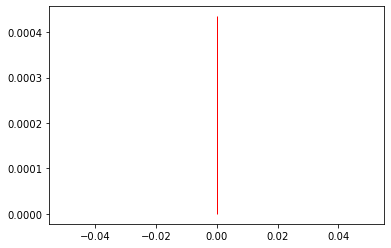

In [55]:
kde = gaussian_kde(sum_array)
x = np.linspace(np.min(sum_array), np.max(sum_array), 1000)
kde_values = kde.evaluate(x)
cdf = np.cumsum(kde_values)/np.sum(kde_values)
index = np.argmax(cdf > 0.95)
plt.fill_between(x[:index], kde_values[:index], color="r")

In [59]:
kde_values

array([4.35212581e-004, 4.63358480e-005, 9.89790889e-007, 8.86328794e-008,
       3.46777839e-008, 3.36814902e-008, 2.22611781e-008, 8.85961744e-009,
       8.65776028e-009, 1.36199839e-008, 3.69081688e-009, 1.07044904e-008,
       8.32607480e-009, 5.31158848e-009, 2.14529695e-009, 3.31044842e-009,
       2.41179270e-009, 2.69930362e-010, 7.49755203e-010, 5.25880337e-009,
       8.53018723e-009, 2.46507778e-011, 1.13784335e-010, 3.18909147e-009,
       4.54064895e-009, 2.96825198e-009, 1.88568874e-009, 1.65100871e-009,
       2.17512809e-009, 2.02827382e-012, 1.71085482e-010, 5.82759461e-010,
       2.20348062e-009, 1.62003920e-009, 1.67996787e-009, 2.22616483e-009,
       6.02450659e-011, 1.23029152e-011, 2.34058153e-009, 2.86445811e-010,
       1.45120377e-023, 5.86328228e-011, 9.23985858e-012, 4.73402169e-017,
       4.59619852e-009, 5.46651886e-010, 2.35661850e-018, 2.15803926e-009,
       2.81193417e-016, 5.21297890e-039, 1.87108019e-044, 5.01375093e-019,
       1.91147279e-009, 1

In [60]:
kde

## Collapsed contig 


In [2]:
os.chdir("/data3/wangyb/0.CPhasing/0.simulation/AT_remove_inter_f0.9/12/n50_500k/test_pipeline/test_collapse")

In [4]:
cool = cooler.Cooler("./ploidy-12.10000.cool")
matrix = cool.matrix(balance=False, sparse=True)[:]

(0.0, 2000.0)

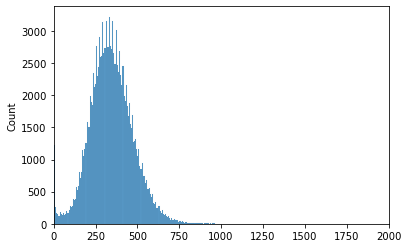

In [10]:
sns.histplot(np.array(matrix.sum(axis=1)).T[0])
plt.xlim(0, 2000)

In [31]:
bins = cool.bins()[:]


contig_idxes = bins[bins['chrom'] == "1B.ctg5"].index 
contig_matrix = matrix.tocsr()[contig_idxes, :][:, contig_idxes].toarray()

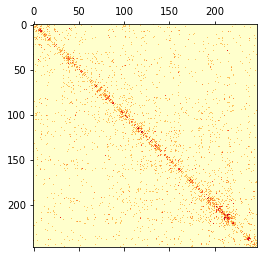

In [32]:
plt.matshow(np.log10(contig_matrix + 1), cmap='YlOrRd')

### Collapsed

In [3]:
os.chdir("/data3/wangyb/0.CPhasing/0.simulation/AT_remove_inter_f0.9/2.2/n50_500k/test_collapsed_0.05")

In [4]:
cool = cooler.Cooler("ploidy-2.2.10000.cool")
matrix = cool.matrix(balance=False, sparse=True)[:]

(0.0, 1000.0)

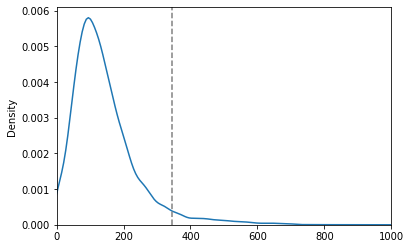

In [24]:
sum_array = np.array(matrix.sum(axis=1)).T[0]
sum_array_nonzero = sum_array[sum_array > 50]
p = np.percentile(sum_array_nonzero, 95)
ax = sns.kdeplot(np.array(matrix.sum(axis=1)).T[0])
ax.axvline(p, linestyle='--', color='gray')

plt.xlim(0, 1000)

In [31]:
sum_array = np.array(matrix.sum(axis=1)).T[0]
sum_array_nonzero = sum_array[sum_array > 50]
np.median(sum_array_nonzero)

1.9 * (np.percentile(sum_array_nonzero, 75) - np.percentile(sum_array_nonzero, 25))

186.2

In [24]:
ind = np.linspace(sum_array_nonzero.min(), sum_array_nonzero.max(), 100)
gkde = gaussian_kde(sum_array_nonzero)
kde_values = gkde.evaluate(ind)
throughs, _ = find_peaks(-kde_values)
throughs


array([54, 74, 95])